In [15]:
# BASE
# ------------------------------------------------------
import numpy as np
import pandas as pd
import os
import gc
import warnings

# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.pyplot import MultipleLocator

# TIME
# ------------------------------------------------------
import time
import datetime
from datetime import timedelta

# PACF - ACF
# ------------------------------------------------------
import statsmodels.api as sm


import scipy.stats as stats
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
from scipy import interpolate

In [2]:
# Import
ID_85 = pd.read_csv('D:\留德十年\TUD\ADP\Data\TagID_085_2018.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates = ['CreateDateTime'],index_col = 'Unnamed: 0')
ID_86 = pd.read_csv('D:\留德十年\TUD\ADP\Data\TagID_086_2018.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates = ['CreateDateTime'],index_col = 'Unnamed: 0')
print(f'TagID_085_2018.csv : {ID_86.shape}')
print(f'TagID_086_2018.csv : {ID_85.shape}')
ID_85["CreateDateTime"]=pd.to_datetime(ID_85["CreateDateTime"])
ID_86["CreateDateTime"]=pd.to_datetime(ID_86["CreateDateTime"])
ID_85.head(5)

TagID_085_2018.csv : (17412, 3)
TagID_086_2018.csv : (18043, 3)


,CreateDateTime,TagValue,TagId
0,2018-08-31 13:53:48.551,1.0,85
1,2018-08-31 13:59:09.063,0.0,85
2,2018-08-31 14:05:18.764,1.0,85
3,2018-08-31 14:14:39.346,0.0,85
4,2018-08-31 14:25:35.449,1.0,85


In [3]:
ID_86.head(5)

,CreateDateTime,TagValue,TagId
0,2018-08-31 13:53:48.551,0.0,86
1,2018-08-31 13:59:09.063,1.0,86
2,2018-08-31 14:00:45.496,0.0,86
3,2018-08-31 14:01:05.601,1.0,86
4,2018-08-31 14:02:11.926,0.0,86


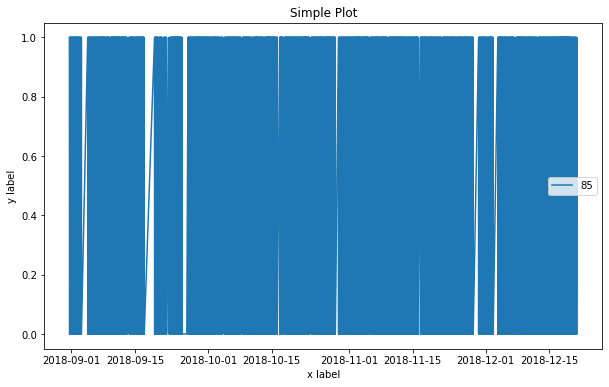

In [4]:
x = ID_85['CreateDateTime']
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, ID_85['TagValue'], label='85') 
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

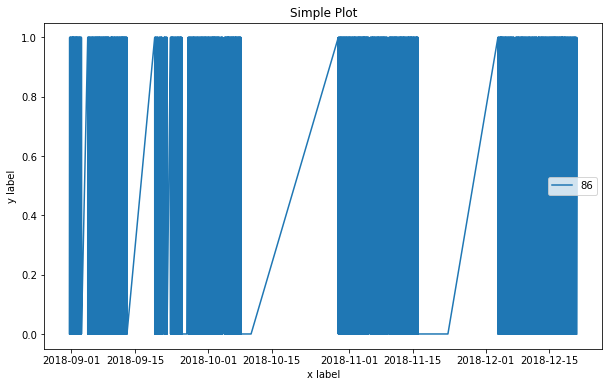

In [5]:
x = ID_86['CreateDateTime']
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, ID_86['TagValue'], label='86') 
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [ ]:
ID_85_86_2018=ID_85.set_index('CreateDateTime').join(ID_86.set_index('CreateDateTime'),lsuffix='_l', rsuffix='_r',how='outer')
#ID_58_141_2018=ID_58_141_2018.interpolate()
ID_85_86_2018

In [ ]:
ID_85_86_2018=ID_85_86_2018.fillna(method="ffill")
ID_85_86_2018

In [ ]:
df=ID_85_86_2018.dropna()
df

In [ ]:
overall_pearson_r = df.corr().iloc[0,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# mit Pandas rechnen Pearson r：0.2058774513561943

r, p = stats.pearsonr(df.dropna()['TagValue_l'], df.dropna()['TagValue_r'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# mit Scipy rechnen Pearson r：0.20587745135619354， p-value：3.7902989479463397e-51


df2=df[['TagValue_l','TagValue_r']]
f,ax=plt.subplots(figsize=(7,3))
df2.rolling(window=150,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Smiling Evidence')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}")
plt.show()

In [6]:
ID_85_86_2018=ID_85.set_index('CreateDateTime').join(ID_86.set_index('CreateDateTime'),lsuffix='_85', rsuffix='_86',how='outer')
#ID_58_141_2018=ID_58_141_2018.interpolate()
ID_85_86_2018

,TagValue_85,TagId_85,TagValue_86,TagId_86
CreateDateTime,,,,
2018-08-31 13:53:48.551,1.0,85.0,0.0,86.0
2018-08-31 13:59:09.063,0.0,85.0,1.0,86.0
2018-08-31 14:00:45.496,NaN,NaN,0.0,86.0
2018-08-31 14:01:05.601,NaN,NaN,1.0,86.0
2018-08-31 14:02:11.926,NaN,NaN,0.0,86.0
...,...,...,...,...
2018-12-20 22:32:47.679,1.0,85.0,NaN,NaN
2018-12-20 22:41:44.079,0.0,85.0,NaN,NaN
2018-12-21 00:31:43.998,NaN,NaN,1.0,86.0


In [7]:
ID_85_86_2018=ID_85_86_2018.fillna(method="ffill")
ID_85_86_2018

,TagValue_85,TagId_85,TagValue_86,TagId_86
CreateDateTime,,,,
2018-08-31 13:53:48.551,1.0,85.0,0.0,86.0
2018-08-31 13:59:09.063,0.0,85.0,1.0,86.0
2018-08-31 14:00:45.496,0.0,85.0,0.0,86.0
2018-08-31 14:01:05.601,0.0,85.0,1.0,86.0
2018-08-31 14:02:11.926,0.0,85.0,0.0,86.0
...,...,...,...,...
2018-12-20 22:32:47.679,1.0,85.0,0.0,86.0
2018-12-20 22:41:44.079,0.0,85.0,0.0,86.0
2018-12-21 00:31:43.998,0.0,85.0,1.0,86.0


In [8]:
ID_85_86_2018.reset_index('CreateDateTime',inplace=True)
ID_85_86_2018

,CreateDateTime,TagValue_85,TagId_85,TagValue_86,TagId_86
0,2018-08-31 13:53:48.551,1.0,85.0,0.0,86.0
1,2018-08-31 13:59:09.063,0.0,85.0,1.0,86.0
2,2018-08-31 14:00:45.496,0.0,85.0,0.0,86.0
3,2018-08-31 14:01:05.601,0.0,85.0,1.0,86.0
4,2018-08-31 14:02:11.926,0.0,85.0,0.0,86.0
...,...,...,...,...,...
28865,2018-12-20 22:32:47.679,1.0,85.0,0.0,86.0
28866,2018-12-20 22:41:44.079,0.0,85.0,0.0,86.0
28867,2018-12-21 00:31:43.998,0.0,85.0,1.0,86.0
28868,2018-12-21 00:36:45.217,1.0,85.0,0.0,86.0


In [38]:
ID_85_86_2018_1 = ID_85_86_2018[(ID_85_86_2018['CreateDateTime']>'2018-11-09 00:00:00')&(ID_85_86_2018['CreateDateTime']<'2018-11-09 00:15:20')].dropna()
ID_85_86_2018_1["CreateDateTime"]=pd.to_datetime(ID_85_86_2018_1["CreateDateTime"])
ID_85_86_2018_1

,CreateDateTime,TagValue_85,TagId_85,TagValue_86,TagId_86
17444,2018-11-09 00:01:20.028,0.0,85.0,1.0,86.0
17445,2018-11-09 00:03:06.578,0.0,85.0,0.0,86.0
17446,2018-11-09 00:03:20.621,1.0,85.0,0.0,86.0
17447,2018-11-09 00:12:34.036,0.0,85.0,1.0,86.0
17448,2018-11-09 00:15:00.691,0.0,85.0,0.0,86.0


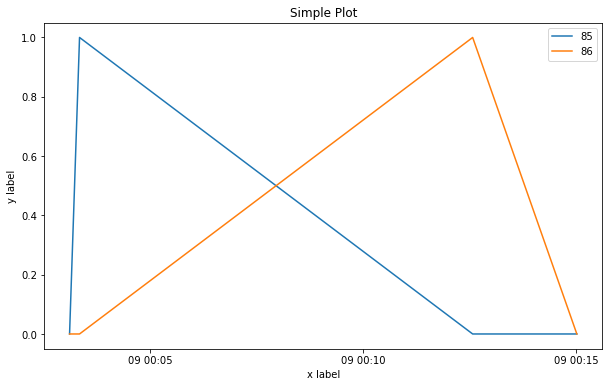

In [35]:
x = ID_85_86_2018_1['CreateDateTime']
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, ID_85_86_2018_1['TagValue_85'], label='85') 
ax.plot(x, ID_85_86_2018_1['TagValue_86'], label='86')
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

In [11]:
# Import
ID_51 = pd.read_csv('D:\留德十年\TUD\ADP\Data\TagID_051_2018.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates = ['CreateDateTime'],index_col = 'Unnamed: 0')
print(f'TagID_051_2018.csv : {ID_51.shape}')
ID_51.head(5)

TagID_051_2018.csv : (7442145, 3)


,CreateDateTime,TagValue,TagId
0,2018-08-23 10:42:57.278,-375.00000,51
1,2018-08-23 10:42:58.299,-380.78699,51
2,2018-08-23 10:42:59.301,-383.10190,51
3,2018-08-23 10:43:00.295,-384.25931,51
4,2018-08-23 10:43:01.297,-387.15280,51


In [12]:
ID_51["CreateDateTime"]=pd.to_datetime(ID_51["CreateDateTime"])
ID_51["CreateDateTime"]

0         2018-08-23 10:42:57.278
1         2018-08-23 10:42:58.299
2         2018-08-23 10:42:59.301
3         2018-08-23 10:43:00.295
4         2018-08-23 10:43:01.297
                    ...          
7442140   2018-12-21 01:01:50.904
7442141   2018-12-21 01:01:51.904
7442142   2018-12-21 01:01:52.905
7442143   2018-12-21 01:01:53.911
7442144   2018-12-21 01:02:04.951
Name: CreateDateTime, Length: 7442145, dtype: datetime64[ns]